<a href="https://colab.research.google.com/github/Shalinda99/fyp-HFI-module/blob/main/ndb_plc_Close_price_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
import pandas as pd
import numpy as np
from google.colab import files



drive.mount('/content/drive')


Mounted at /content/drive


In [ ]:
# Load the dataset
price_df = pd.read_csv('/content/drive/My Drive/Colab Notebooks/SP_SL_20_dataset_final.csv')
price_df.head()

,Trade Date,Open (Rs.),High (Rs.),Low (Rs.),Close (Rs.),TradeVolume,ShareVolume,Turnover (Rs.),Company Name,Stock Return
0,1/31/2025,120.75,121.5,119.00,119.50,523,1016885,122167426.0,SAMPATH BANK PLC,NaN
1,1/30/2025,119.75,120.5,118.75,120.00,587,1279402,152615285.3,SAMPATH BANK PLC,NaN
2,1/29/2025,122.00,122.0,118.50,119.25,1354,2563188,307574122.8,SAMPATH BANK PLC,NaN
3,1/28/2025,122.00,122.5,121.00,121.25,838,990361,120261351.3,SAMPATH BANK PLC,NaN
4,1/27/2025,122.00,123.0,121.50,122.00,694,895710,109462379.0,SAMPATH BANK PLC,NaN


In [ ]:
ndb_plc_price_df = price_df[price_df['Company Name'] == "NATIONAL DEVELOPMENT BANK PLC"]

In [ ]:
ndb_plc_price_df['Trade Date'] = pd.to_datetime(ndb_plc_price_df['Trade Date']).dt.date

/tmp/ipython-input-4-2481250827.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ndb_plc_price_df['Trade Date'] = pd.to_datetime(ndb_plc_price_df['Trade Date']).dt.date


In [ ]:
ndb_plc_price_df

,Trade Date,Open (Rs.),High (Rs.),Low (Rs.),Close (Rs.),TradeVolume,ShareVolume,Turnover (Rs.),Company Name,Stock Return
10623,2025-01-31,128.50,129.50,126.75,127.50,283,195576,25047056.75,NATIONAL DEVELOPMENT BANK PLC,NaN
10624,2025-01-30,126.50,128.50,124.00,128.25,369,696532,88049819.75,NATIONAL DEVELOPMENT BANK PLC,NaN
10625,2025-01-29,128.00,129.00,126.00,126.25,307,223722,28424900.50,NATIONAL DEVELOPMENT BANK PLC,NaN
10626,2025-01-28,128.00,129.00,127.50,128.00,299,386811,49542550.75,NATIONAL DEVELOPMENT BANK PLC,NaN
10627,2025-01-27,129.25,130.25,126.50,127.50,465,705077,90366899.00,NATIONAL DEVELOPMENT BANK PLC,NaN
...,...,...,...,...,...,...,...,...,...,...
11802,2020-01-08,99.90,99.90,96.00,96.80,106,87942,8538837.30,NATIONAL DEVELOPMENT BANK PLC,NaN
11803,2020-01-07,99.00,100.10,99.00,99.20,15,10633,1058065.90,NATIONAL DEVELOPMENT BANK PLC,NaN
11804,2020-01-06,101.00,101.00,99.00,100.30,32,35421,3546367.90,NATIONAL DEVELOPMENT BANK PLC,NaN
11805,2020-01-03,101.00,103.00,100.00,101.00,28,33519,3359582.10,NATIONAL DEVELOPMENT BANK PLC,NaN


In [ ]:
import matplotlib.pyplot as plt

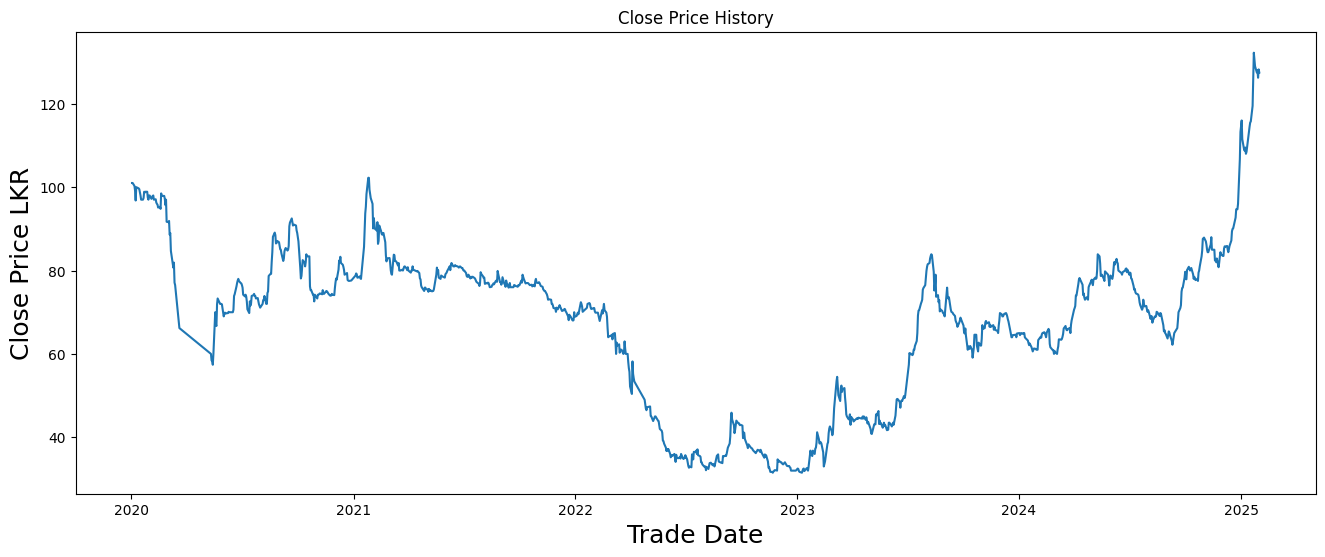

In [ ]:
plt.figure(figsize=(16,6))
plt.title('Close Price History')
plt.plot(ndb_plc_price_df['Trade Date'],ndb_plc_price_df['Close (Rs.)'])
plt.xlabel('Trade Date', fontsize=18)
plt.ylabel('Close Price LKR', fontsize=18)
plt.show()

In [ ]:
# Create a new dataframe with only the 'Close column
data = ndb_plc_price_df.filter(['Close (Rs.)'])
# Convert the dataframe to a numpy array
dataset = data.values
# Get the number of rows to train the model on
training_data_len = int(np.ceil( len(dataset) * .95 ))

training_data_len

1125

In [ ]:
# Scale the data
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(dataset)

scaled_data

array([[0.9528536 ],
       [0.96029777],
       [0.94044665],
       ...,
       [0.68287841],
       [0.6898263 ],
       [0.6898263 ]])

In [ ]:
train_data = scaled_data[0:int(training_data_len), :]
# Split the data into x_train and y_train data sets
x_train = []
y_train = []

for i in range(60, len(train_data)):
    x_train.append(train_data[i-60:i, 0])
    y_train.append(train_data[i, 0])
    if i<= 61:
        print(x_train)
        print(y_train)
        print()

# Convert the x_train and y_train to numpy arrays
x_train, y_train = np.array(x_train), np.array(y_train)

# Reshape the data
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))

[array([0.9528536 , 0.96029777, 0.94044665, 0.95781638, 0.9528536 ,
       0.96774194, 0.98511166, 1.        , 0.93052109, 0.87344913,
       0.83622829, 0.8337469 , 0.82382134, 0.76426799, 0.75930521,
       0.77419355, 0.76674938, 0.76923077, 0.79404467, 0.83870968,
       0.81141439, 0.74689826, 0.64019851, 0.62729529, 0.62729529,
       0.60744417, 0.58759305, 0.58163772, 0.58064516, 0.57468983,
       0.5528536 , 0.53995037, 0.53200993, 0.52506203, 0.53101737,
       0.53995037, 0.53796526, 0.53895782, 0.53399504, 0.51612903,
       0.51612903, 0.52009926, 0.52506203, 0.51414392, 0.50024814,
       0.48933002, 0.5101737 , 0.50124069, 0.50818859, 0.50521092,
       0.53101737, 0.53101737, 0.56079404, 0.54292804, 0.53895782,
       0.52506203, 0.52506203, 0.53101737, 0.54292804, 0.55086849])]
[np.float64(0.559801488833747)]

[array([0.9528536 , 0.96029777, 0.94044665, 0.95781638, 0.9528536 ,
       0.96774194, 0.98511166, 1.        , 0.93052109, 0.87344913,
       0.83622829, 0.8337

In [ ]:
!pip install keras

In [ ]:
from keras.models import Sequential
from keras.layers import Dense, LSTM, Dropout

# # Build the LSTM model
# model = Sequential()
# model.add(LSTM(128, return_sequences=True, input_shape= (x_train.shape[1], 1)))
# model.add(LSTM(64, return_sequences=False))
# model.add(Dense(25))
# model.add(Dense(1))

# # Compile the model
# model.compile(optimizer='adam', loss='mean_squared_error')

model = Sequential()
model.add(LSTM(units=64, return_sequences=True, input_shape=(x_train.shape[1], 1)))
model.add(Dropout(0.2))
model.add(LSTM(units=32))
model.add(Dense(1))

model.compile(loss="mean_squared_error", optimizer="adam")

# Train the model
model.fit(x_train, y_train, batch_size=1, epochs=20)


Epoch 1/20


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1065/1065 ━━━━━━━━━━━━━━━━━━━━ 42s 37ms/step - loss: 0.0058
Epoch 2/20
1065/1065 ━━━━━━━━━━━━━━━━━━━━ 28s 27ms/step - loss: 0.0013
Epoch 3/20
1065/1065 ━━━━━━━━━━━━━━━━━━━━ 41s 27ms/step - loss: 8.5656e-04
Epoch 4/20
1065/1065 ━━━━━━━━━━━━━━━━━━━━ 42s 27ms/step - loss: 6.5316e-04
Epoch 5/20
1065/1065 ━━━━━━━━━━━━━━━━━━━━ 28s 27ms/step - loss: 6.7011e-04
Epoch 6/20
1065/1065 ━━━━━━━━━━━━━━━━━━━━ 41s 27ms/step - loss: 5.4887e-04
Epoch 7/20
1065/1065 ━━━━━━━━━━━━━━━━━━━━ 41s 27ms/step - loss: 5.4627e-04
Epoch 8/20
1065/1065 ━━━━━━━━━━━━━━━━━━━━ 41s 26ms/step - loss: 5.6248e-04
Epoch 9/20
1065/1065 ━━━━━━━━━━━━━━━━━━━━ 41s 27ms/step - loss: 4.3817e-04
Epoch 10/20
1065/1065 ━━━━━━━━━━━━━━━━━━━━ 41s 27ms/step - loss: 4.4351e-04
Epoch 11/20
1065/1065 ━━━━━━━━━━━━━━━━━━━━ 41s 26ms/step - loss: 4.7138e-04
Epoch 12/20
1065/1065 ━━━━━━━━━━━━━━━━━━━━ 41s 27ms/step - loss: 4.0596e-04
Epoch 13/20
1065/1065 ━━━━━━━━━━━━━━━━━━━━ 41s 26ms/step - loss: 4.0467e-04
Epoch 14/20
1065/1065 ━━━━━━━━━━━━━━━━━━

In [ ]:
model.save('/content/drive/My Drive/FYP/ndb_plc_lstm_model.h5')

In [ ]:
# Create the testing data set
# Create a new array containing scaled values from index 1543 to 2002
test_data = scaled_data[training_data_len - 60: , :]
# Create the data sets x_test and y_test
x_test = []
y_test = dataset[training_data_len:, :]
for i in range(60, len(test_data)):
    x_test.append(test_data[i-60:i, 0])

# Convert the data to a numpy array
x_test = np.array(x_test)

# Reshape the data
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1 ))

# Get the models predicted price values
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)

# Get the root mean squared error (RMSE)
rmse = np.sqrt(np.mean(((predictions - y_test) ** 2)))
rmse

2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 332ms/step


np.float64(3.959645256684973)

In [ ]:
from sklearn.metrics import r2_score

r2 = r2_score(y_test, predictions)
print(f"R-squared: {r2}")

R-squared: 0.913030336172158


/tmp/ipython-input-16-1041969288.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Predictions'] = predictions


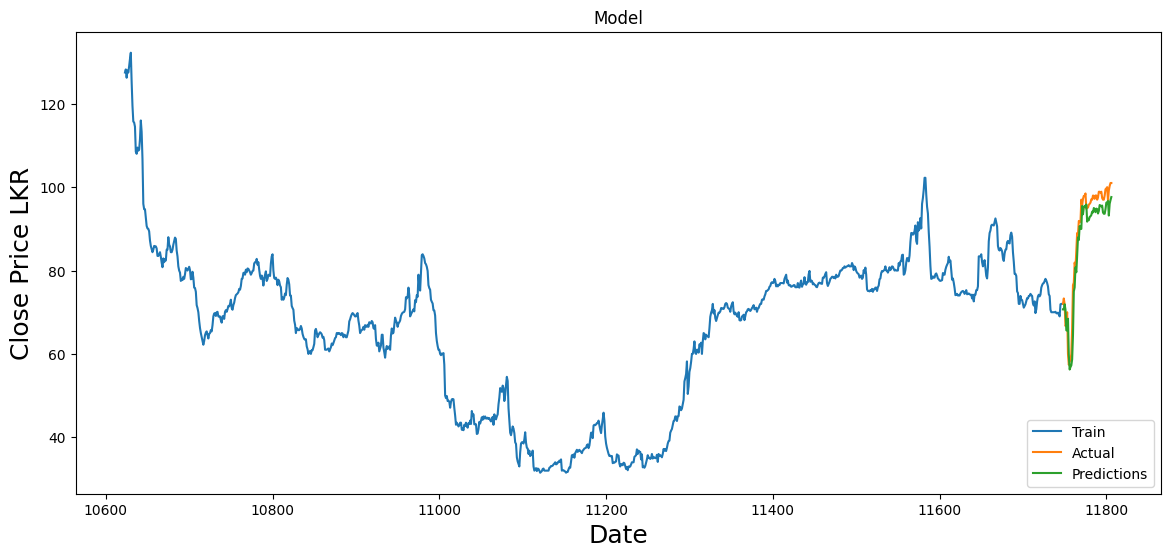

In [ ]:
# Plot the data
train = data[:training_data_len]
valid = data[training_data_len:]
valid['Predictions'] = predictions
# Visualize the data
plt.figure(figsize=(14,6))
plt.title('Model')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price LKR', fontsize=18)
plt.plot(train['Close (Rs.)'])
plt.plot(valid[['Close (Rs.)', 'Predictions']])
plt.legend(['Train', 'Actual', 'Predictions'], loc='lower right')
plt.show()